# Linear Regression with one variable

In this part of this exercise, you will implement linear regression with one
variable to predict profits for a food truck. Suppose you are the CEO of a
restaurant franchise and are considering dierent cities for opening a new
outlet. The chain already has trucks in various cities and you have data for
profits and populations from the cities.
You would like to use this data to help you select which city to expand
to next.
The file ex1data1.txt contains the dataset for our linear regression prob-
lem. The first column is the population of a city and the second column is
the profit of a food truck in that city. A negative value for profit indicates a
loss.



In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

Create a dataframe from the text file with data

In [3]:
path = open(r'C:\Users\Igor Kolasa\ML-exercises\data\ex1data1.txt')
data = pd.read_csv(path, header=None, names=['Population of city in 10,000s', 'Profit in $10,000s'])
data.head()

,"Population of city in 10,000s","Profit in $10,000s"
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Let's plot our dataset

<AxesSubplot:xlabel='Population of city in 10,000s', ylabel='Profit in $10,000s'>

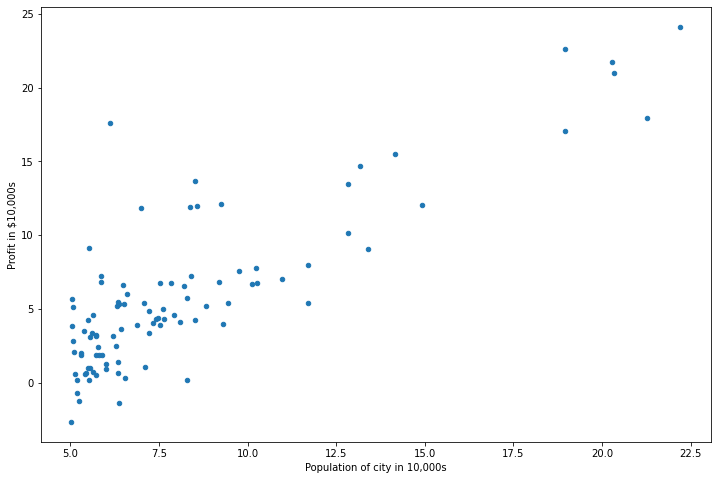

In [4]:
data.plot(kind='scatter', x='Population of city in 10,000s', y='Profit in $10,000s', figsize=(12,8))

Add a column of ones to dataset so we can use a vectorized solution to computing the cost and gradients

In [5]:
data.insert(0, 'Ones', 1)

Split our dataset into features set and labels set
 

In [6]:
X = data.iloc[:,0:2]
y = data.iloc[:,2]

In [7]:
X.head()

,Ones,"Population of city in 10,000s"
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [8]:
y.head()

0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: Profit in $10,000s, dtype: float64

Convert our dataframes into numpy arrays for further computations


In [9]:
X = X.to_numpy() # (97, 2)
y = y.to_numpy() # (97,)

# Convert 1D array y to 2D array (column vector)
y = np.reshape(y, (-1, 1)) # (97, 1)

# Initialize fitting parameters
theta = np.zeros((2,1)) # (2, 1)

Define function to compute cost

In [10]:
def compute_cost(X, y, theta):
    # number of training examples
    m = X.shape[0] 

    # hypothesis
    h = np.dot(X, theta) # (97, 1)

    error = h - y
    error_sqr = np.square(error)
    return  np.sum(error_sqr) / (2 * m)

In [11]:
J = compute_cost(X, y, theta)
print(J)

32.072733877455676


Implement gradient descent

In [12]:
def gradient_descent(X, y, theta, l_rate, num_iters):
    # List of costs after each gradient descent step
    J_list = []

    # number of training examples
    m = X.shape[0]

    for i in range(num_iters):
        
        # hypothesis
        h = np.dot(X, theta) # (97, 1)

        error = h - y
        theta = theta - l_rate * np.dot(X.T, error) / m

        J_list.append(compute_cost(X, y, theta))
    
    return (theta, J_list)

In [13]:
l_rate = 0.01
num_iters = 1500
theta, J_list = gradient_descent(X, y, theta, l_rate, num_iters)
print(theta)

[[-3.63029144]
 [ 1.16636235]]


Plot the cost change over the gradient descent iterations

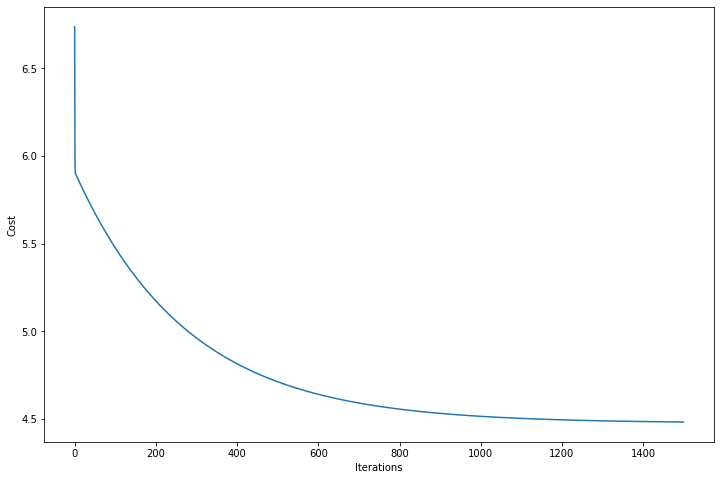

In [14]:
plt.figure(figsize=(12,8))
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.plot(range(num_iters), J_list)

Compute the final cost

In [15]:
J = compute_cost(X, y, theta)
print(J)

4.483388256587726


Plot the linear fit

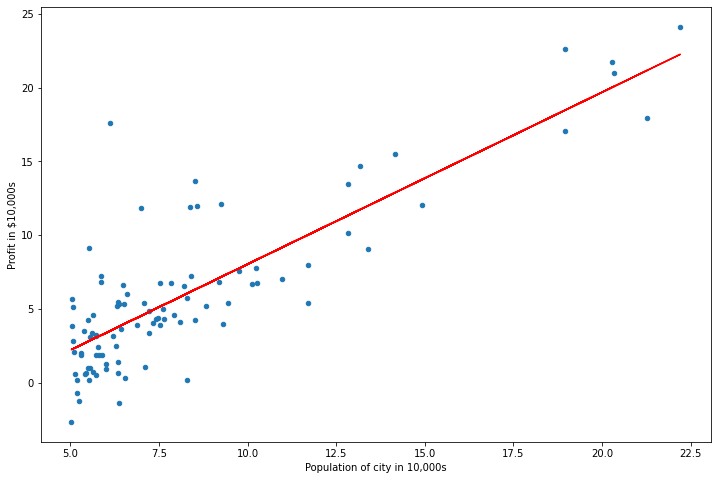

In [16]:
data.plot(kind='scatter', x='Population of city in 10,000s', y='Profit in $10,000s', figsize=(12,8))
plt.plot(X[:,1], np.dot(X, theta), c='r')

Predict some profits based on the population size

In [17]:
# Profit for population size of 35,000
predict_1 = np.dot(np.array([1, 3.5]), theta)
print('For population = 35,000, we predict a profit of {profit}'.format(profit=predict_1*10000))
    

# Profit for population size of 200,000
predict_2 = np.dot(np.array([1, 20]), theta)
print('For population = 200,000, we predict a profit of {profit}'.format(profit=predict_2*10000))


For population = 35,000, we predict a profit of [4519.7678677]
For population = 200,000, we predict a profit of [196969.55567307]
